In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [ ]:
merged_manga = pd.read_csv('merged_manga.csv')

In [ ]:
merged_manga

,Unnamed: 0,title,url_anime,date_published_anime,score_anime,rank_anime,members_anime,anime_exists,url,date_published,score,rank,members
0,0,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,2011-01 - 2011-01,9.07,3.0,112561201.0,yes,https://myanimelist.net/manga/39859/Steins_Gate,2011-01 - 2012-01,8.58,3,213037
1,1,Steins;Gate,https://myanimelist.net/anime/9253/Steins_Gate,2011-01 - 2011-01,9.07,3.0,112561201.0,yes,https://myanimelist.net/manga/39859/Steins_Gate,2011-01 - 2012-01,8.58,3,213037
2,2,One Piece,https://myanimelist.net/anime/21/One_Piece,1999-01,8.72,1.0,2352301.0,yes,https://myanimelist.net/manga/13/One_Piece,1997-01,9.22,4,619021
3,3,One Piece,https://myanimelist.net/anime/21/One_Piece,1999-01,8.72,1.0,2352301.0,yes,https://myanimelist.net/manga/13/One_Piece,1997-01,9.22,4,619021
4,4,Kimi no Suizou wo Tabetai,https://myanimelist.net/anime/36098/Kimi_no_Su...,2018-01 - 2018-01,8.55,5.0,965483.0,yes,https://myanimelist.net/manga/117077/Kimi_no_S...,2015-01 - 2015-01,8.68,4,157521
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,649,Akachan to Boku,NaN,NaN,NaN,NaN,NaN,no,https://myanimelist.net/manga/76/Akachan_to_Boku,1991-01 - 1997-01,7.66,1,972604
650,650,DOLL: IC in a Doll,NaN,NaN,NaN,NaN,NaN,no,https://myanimelist.net/manga/298/DOLL__IC_in_...,2000-01 - 2002-01,7.66,2,22247
651,651,Penguin☆Brothers,NaN,NaN,NaN,NaN,NaN,no,https://myanimelist.net/manga/899/Penguin☆Brot...,1999-01 - 2001-01,7.66,3,15587
652,652,Suzumiya Haruhi no Yuuutsu,NaN,NaN,NaN,NaN,NaN,no,https://myanimelist.net/manga/1253/Suzumiya_Ha...,2004-01 - 2004-01,7.66,4,43879


In [ ]:
label_encoder = LabelEncoder()
merged_manga['anime_exists_encoded'] = label_encoder.fit_transform(merged_manga['anime_exists'])

In [ ]:
X = merged_manga[['score', 'rank', 'members']]
y = merged_manga['anime_exists_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

#not great for binary values

Mean Absolute Error: 0.16114503816793893


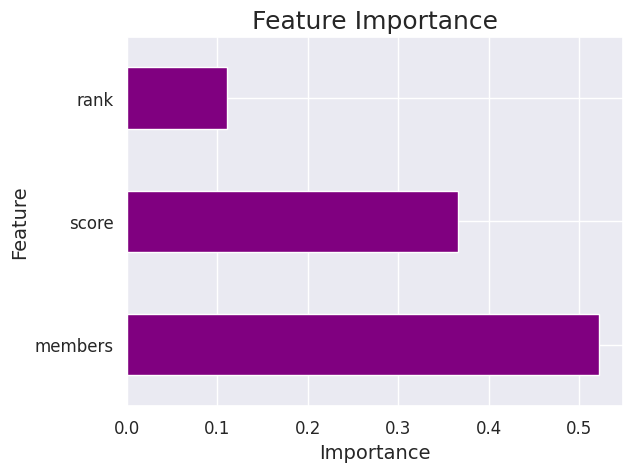

In [ ]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

top_features = feature_importance.nlargest(10)
top_features.plot(kind='barh', color='purple')

plt.title('Feature Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# RandomForestRegressor with best parameters
best_rf_model = RandomForestRegressor(n_estimators=100,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=42)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.16114503816793893


In [ ]:
threshold = 0.5

binary_predictions = (val_predictions >= threshold).astype(int)


val_predictions_df = pd.DataFrame({'Predicted_Values': binary_predictions})

print(val_predictions_df)


     Predicted_Values
0                   0
1                   1
2                   0
3                   0
4                   0
..                ...
126                 0
127                 0
128                 0
129                 1
130                 0

[131 rows x 1 columns]


In [ ]:
#Accuracy and Confusion matrix
y_true = y_test

binary_predictions = val_predictions_df['Predicted_Values']

accuracy = accuracy_score(y_true, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_true, binary_predictions)
print('Confusion Matrix:')
print(cm)


Accuracy: 0.9313
Confusion Matrix:
[[101   3]
 [  6  21]]


In [ ]:
# Calculating precision, recall, and F1-score
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.8750
Recall: 0.7778
F1-score: 0.8235


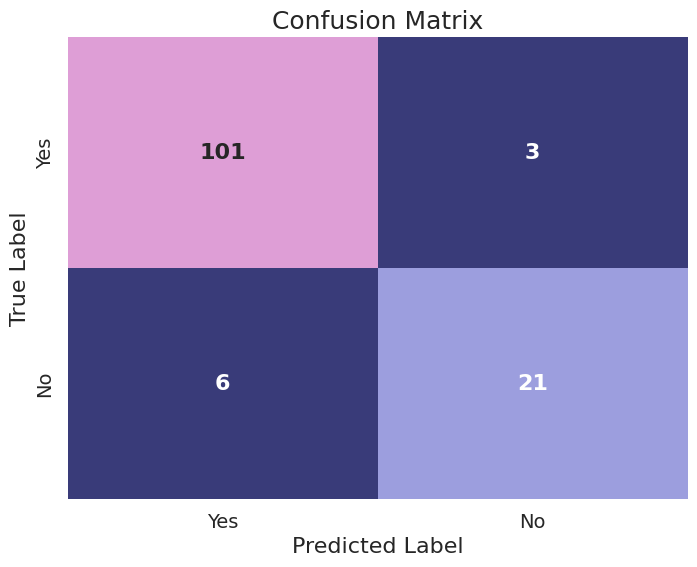

In [ ]:
#Pretty Confusion Matrix
cm = confusion_matrix(y_true, binary_predictions)

class_names = ['Yes', 'No']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='tab20b', cbar=False,
            annot_kws={'size': 16, 'weight': 'bold'},
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


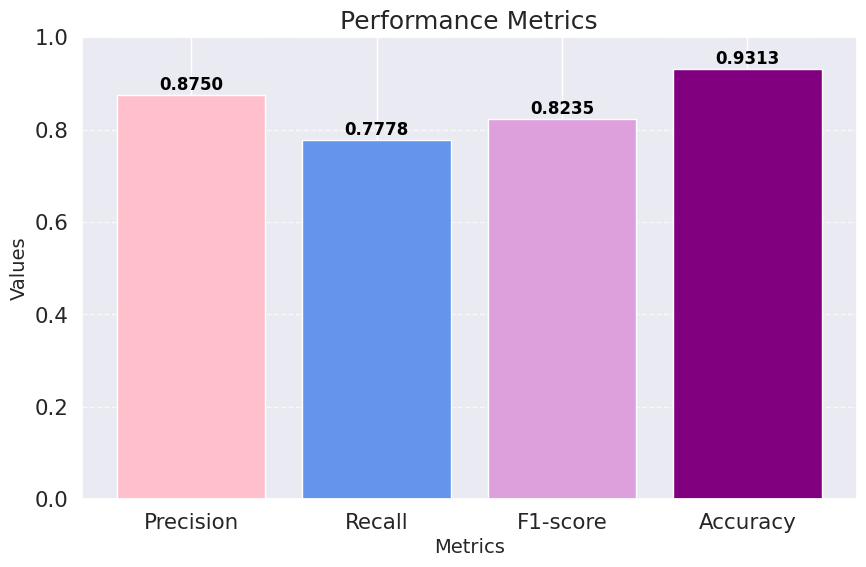

In [ ]:

# Define the metrics and their corresponding values
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
values = [0.8750, 0.7778, 0.8235, 0.9313]

# Plotting the metrics using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['pink', 'cornflowerblue', 'plum', 'purple'])
plt.title('Performance Metrics', fontsize=18)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Annotating each bar with its value
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', fontweight='bold', fontsize=12)

plt.ylim(0, 1.0)  # Set y-axis limits from 0 to 1 for better visualization of metrics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
